In [182]:
print("DATA 205")

DATA 205


In [183]:
#Importing packages

import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
#Getting working directory

working_directory = os.getcwd()
print(working_directory)

/Users/rohingarg/DATA205CAPSTONE


In [185]:
#Pulling in the "Police Dispatched Incidents" dataset from Data Montgomery

url_pdi = "https://data.montgomerycountymd.gov/api/views/98cc-bc7d/rows.csv?accessType=DOWNLOAD"
df_pdi = pd.read_csv(url_pdi)
df_pdi.head()

/Users/rohingarg/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,11,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Incident_ID,Crime Reports,Crash Reports,Start Time,End Time,Priority,Initial Type,Close Type,Address,City,State,Zip,Longitude,Latitude,Police District Number,Beat,PRA,CallTime CallRoute,Calltime Dispatch,Calltime Arrive,Calltime Cleared,CallRoute Dispatch,Dispatch Arrive,Arrive Cleared,Disposition Desc,Location
0,P1900099420,190014036,NaN,03/26/2019 07:37:19 PM,03/26/2019 08:40:41 PM,4,THEFT/LARCENY - OCCURRED EARLIER,THEFT/LARCENY - OCCURRED EARLIER,4600 BLK EDGEFIELD RD,BETHESDA,MD,20814,-77,39,2D,D3,183,126,405,906,3801,278,501,2894,LARCENYOTHEROVER$200,POINT (-77.0914 39.0187)
1,P1900281711,190040608,NaN,08/25/2019 01:01:36 AM,08/25/2019 01:49:12 AM,1,"MISSING, RUNAWAY, FOUND PERSON","MISSING, RUNAWAY, FOUND PERSON",9500 BLK HORIZON RUN RD,MONTGOMERY VILLAGE,MD,20886,-77,39,6D,R1,505,448,669,852,2855,220,182,2003,JUVENILERUNAWAY,POINT (-77.1962 39.1578)
2,P1900027078,190003827,NaN,01/24/2019 05:38:00 PM,01/24/2019 10:41:53 PM,3,INDECENCY/LEWDNESS - OCCURRED EARLIER,INDECENCY/LEWDNESS - OCCURRED EARLIER,400 BLK W DIAMOND AVE,GAITHERSBURG,MD,20877,-77,39,6D,P1,429,341,370,4413,18232,29,4042,13819,SEXOFFNS-INDECNTEXPOSR,POINT (-77.2095 39.1405)
3,P1900366994,190053313,NaN,11/05/2019 02:43:58 PM,11/05/2019 04:56:51 PM,4,FRAUD/DECEPTION - OCCURRED EARLIER,FRAUD/DECEPTION - OCCURRED EARLIER,10400 BLK AUTO PARK AVE,BETHESDA,MD,20817,-77,39,2D,E3,520,163,5597,6624,7973,5434,1026,1348,FORGERY/CNTRFT-CHECKS,POINT (-77.1447 39.0272)
4,P1900219122,NaN,NaN,07/01/2019 11:35:38 PM,07/01/2019 11:49:08 PM,0,DOMESTIC DISTURBANCE/VIOLENCE,DOMESTIC DISTURBANCE/VIOLENCE,18800 BLK NATHANS PL,MONTGOMERY VILLAGE,MD,20886,-77,39,6D,R1,505,162,200,396,810,38,195,413,FAMILYTROUBLE,POINT (-77.2012 39.1609)


In [ ]:
#Removing the Scientific Notation from the data. For example, changes ZIP Codes from 2.1e4 to 20851

pd.options.display.float_format = '{:.0f}'.format

#Also, removing unnecessary columns

del df_pdi['Police District Number']
del df_pdi['Beat']
del df_pdi['PRA']
df_pdi.head()

In [189]:
# Pulling in the "Crime Reporting Incidents" dataset from Data Montgomery

url_cri = "https://data.montgomerycountymd.gov/api/views/bhju-22kf/rows.csv?accessType=DOWNLOAD"
df_cri = pd.read_csv(url_cri)
df_cri.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,Lane Number,Lane Type,Number of Lanes,Direction,Distance,Distance Unit,Road Grade,NonTraffic,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,At Fault,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,First Harmful Event,Second Harmful Event,Fixed Oject Struck,Junction,Intersection Type,Intersection Area,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
0,MCP3048005T,190046316,Montgomery County Police,Property Damage Crash,09/27/2019 09:38:00 AM,No,NaN,nan,NaN,NaN,0,NaN,0,NaN,nan,NaN,NaN,Yes,NaN,NaN,NaN,"IN FRONT OF 6630 EAMES WAY BETHESDA, MD.",NaN,NaN,DRIVER,SINGLE VEHICLE,CLEAR,NaN,DAYLIGHT,NaN,NaN,NaN,OTHER,NaN,BUILDING,NaN,NaN,NaN,NaN,NaN,NaN,39,-77,"(39.0267, -77.136785)"
1,EJ78460055,200017938,Gaithersburg Police Depar,Property Damage Crash,05/02/2020 02:16:00 PM,Yes,NaN,nan,NaN,NaN,0,NaN,0,NaN,nan,NaN,NaN,Yes,NaN,NaN,NaN,949 CLOPPER RD PARKING LOT,NaN,NaN,DRIVER,STRAIGHT MOVEMENT ANGLE,CLEAR,NaN,DAYLIGHT,NO CONTROLS,UNKNOWN,NaN,PARKED VEHICLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,-77,"(39.14795617, -77.2296164)"
2,MCP3245000H,200036179,Montgomery County Police,Injury Crash,09/15/2020 03:33:00 PM,No,NaN,nan,NaN,NaN,0,NaN,0,NaN,nan,NaN,NaN,Yes,NaN,NaN,NaN,PARKING LOT @ 9827 BROOKRIDGE CT,NaN,NaN,DRIVER,STRAIGHT MOVEMENT ANGLE,CLEAR,NaN,DAYLIGHT,NO CONTROLS,NaN,NaN,OTHER VEHICLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,-77,"(39.18886167, -77.202455)"
3,HA23890011,20002466,Maryland-National Capital,Property Damage Crash,10/14/2020 08:40:00 AM,No,NaN,nan,NaN,NaN,0,NaN,0,NaN,nan,NaN,NaN,Yes,NaN,NaN,NaN,GRAVEL PARKING LOT AT POPE FARM NURSERY,NaN,NaN,UNKNOWN,NaN,NaN,NaN,DAYLIGHT,NaN,NaN,NaN,UNITS SEPARATED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,-77,"(39.15869731, -77.14679055)"
4,MCP3090003Z,200010527,Montgomery County Police,Property Damage Crash,03/03/2020 09:19:00 AM,No,NaN,nan,NaN,NaN,0,NaN,0,NaN,nan,NaN,NaN,Yes,NaN,NaN,NaN,PARKING LOT OF 16705 CRABBS BRANCH WAY,NaN,NaN,DRIVER,SINGLE VEHICLE,CLOUDY,NaN,DAYLIGHT,NaN,NaN,NaN,OTHER OBJECT,NaN,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,39,-77,"(39.1292155, -77.16734233)"


In [190]:
# Removing unnecessary columns

del df_cri['Report Number']
del df_cri['Local Case Number']
del df_cri['Junction']
del df_cri['Intersection Type']
df_cri.head()

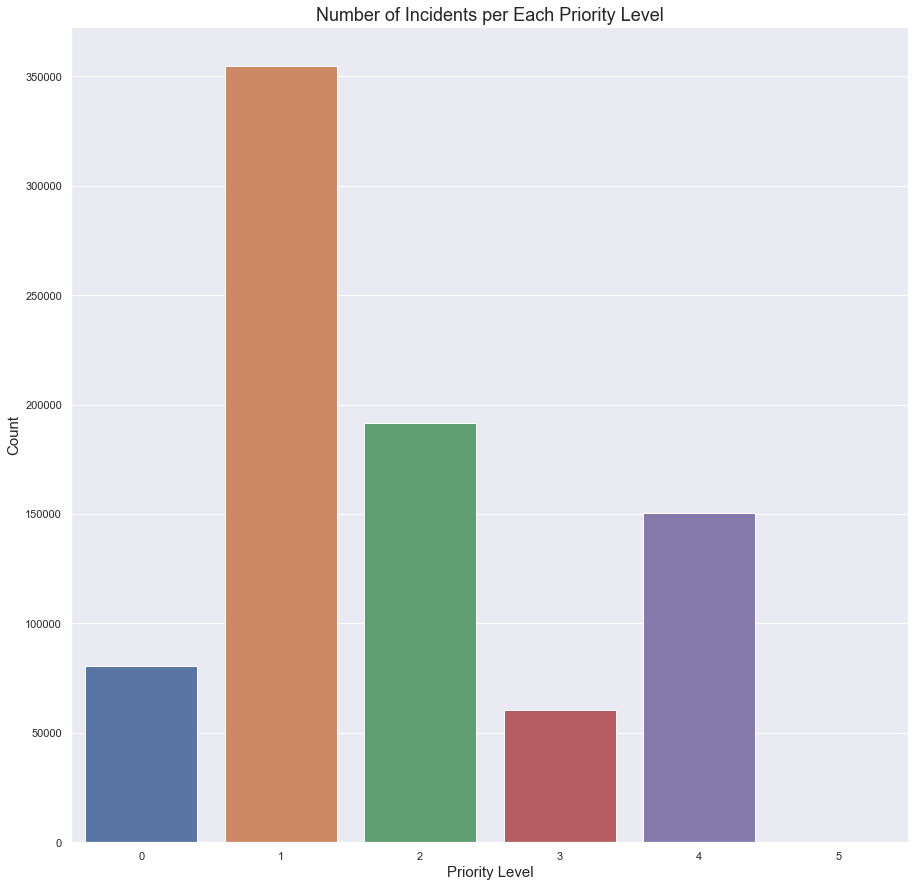

In [192]:
#Determining the frequency of incidents relating to their priority level

sns.countplot(x = df_pdi.Priority)
plt.title('Number of Incidents per Each Priority Level', fontsize = 18)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Priority Level', fontsize = 15)
plt.show()

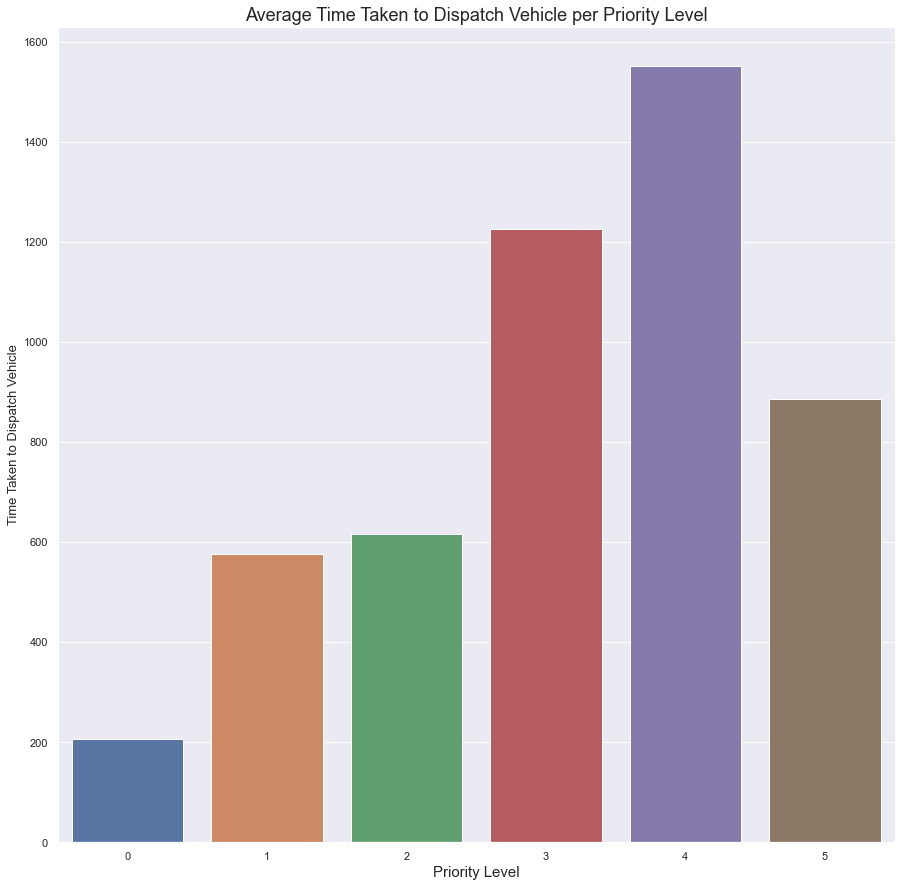

In [193]:
#Bar graph displaying the average dispatch time per priority level
# 0 is the highest priority and 5 is the lowest priority

prioritylevels = df_pdi.groupby(['Priority']).mean()
sns.barplot(x= prioritylevels.index, y = 'Calltime Dispatch', data = prioritylevels)
plt.title('Average Time Taken to Dispatch Vehicle per Priority Level', fontsize = 18)
plt.ylabel('Time Taken to Dispatch Vehicle', fontsize = 13)
plt.xlabel('Priority Level', fontsize = 15)
plt.show()

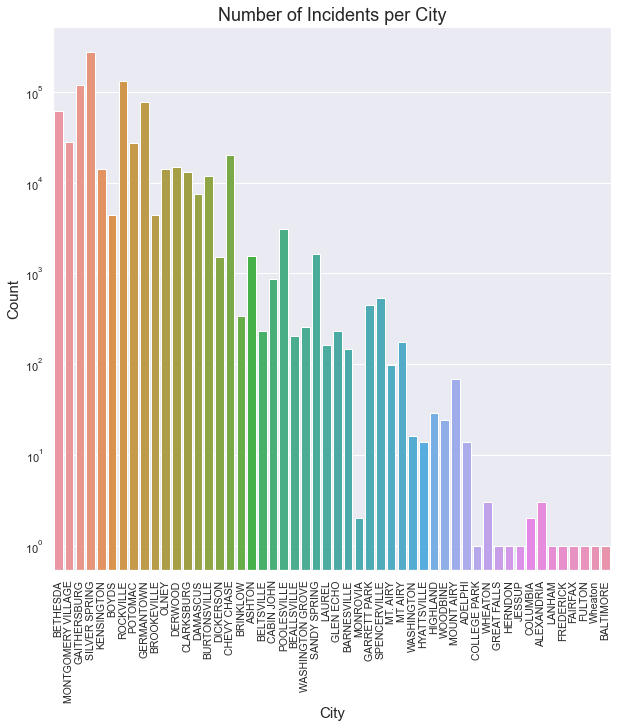

In [194]:
#Bar graph illustrating the frequncy of incidents in each city
# Y-Axis is log-scaled

sns.set(rc = {'figure.figsize': (10,10)})
freq = sns.countplot(x = 'City', data = df_pdi)
freq.set_xticklabels(freq.get_xticklabels(), rotation = 90, fontsize = 10.5)
freq.set(yscale="log")
plt.title('Number of Incidents per City', fontsize = 18)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('City', fontsize = 15)
plt.show()

In [227]:
# Creating new dataset only containing the top 3 cities with the most incidents
# Silver Spring, Rockville, and Gaithersburg

common_cities = df_pdi[(df_pdi.City == 'SILVER SPRING') | (df_pdi.City == 'ROCKVILLE') | (df_pdi.City == 'GAITHERSBURG')]
common_cities.head()

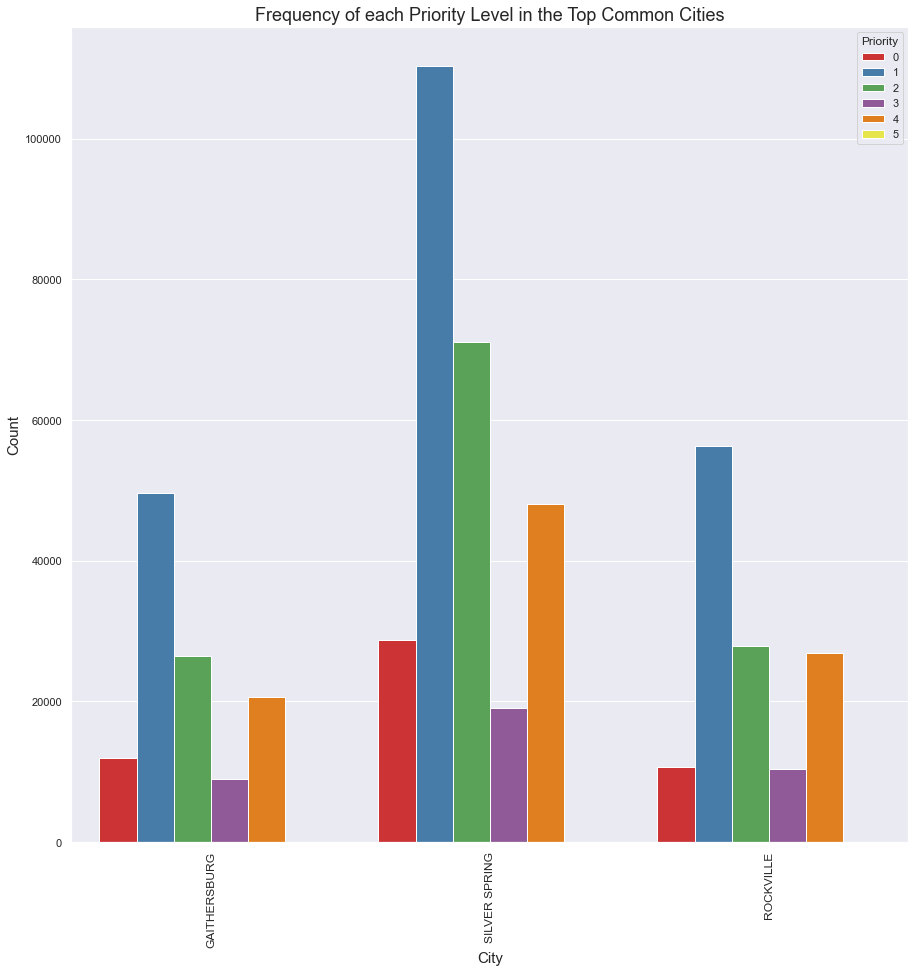

In [228]:
#Grouped bar graph depicting the frequency of each priority level in the cities with the highest incidents

sns.countplot(x = "City", hue = "Priority", data = common_cities, palette = "Set1")
plt.xticks(fontsize = 12, rotation = 90)
plt.title('Frequency of each Priority Level in the Top Common Cities', fontsize = 18)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('City', fontsize = 15)
plt.show()

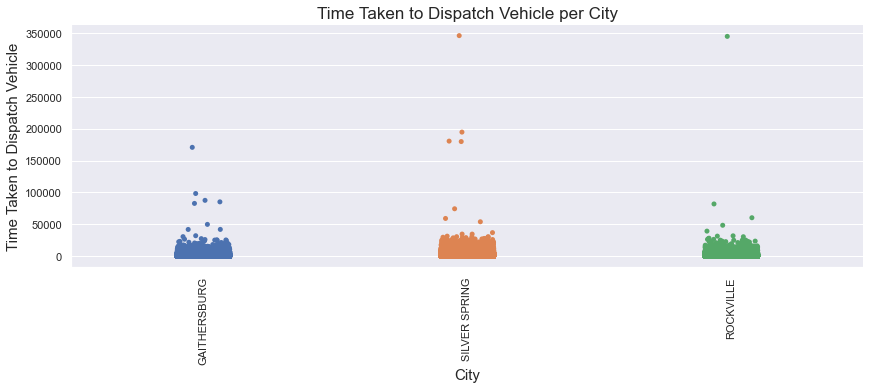

In [198]:
# Showing which the time taken to dispatch a vehicle for the three most common cities

citydispatch = sns.catplot(x='City', y = 'Calltime Dispatch', jitter = True, data = common_cities, height = 4, aspect = 3)
citydispatch.set_xticklabels(rotation = 90)
plt.title('Time Taken to Dispatch Vehicle per City', fontsize = 17)
plt.ylabel('Time Taken to Dispatch Vehicle', fontsize = 15)
plt.xlabel('City', fontsize = 15)
plt.show()

In [199]:
# Creating new dataframe to further analyze dispatch time

common_dispatch = common_cities
common_dispatch.rename(columns={'Calltime Dispatch':'DispatchTime'}, inplace=True)
common_dispatch = common_dispatch[(common_dispatch.DispatchTime <= 10000)]
common_dispatch.head()

/Users/rohingarg/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Incident_ID,Crime Reports,Crash Reports,Start Time,End Time,Priority,Initial Type,Close Type,Address,City,State,Zip,Longitude,Latitude,CallTime CallRoute,DispatchTime,Calltime Arrive,Calltime Cleared,CallRoute Dispatch,Dispatch Arrive,Arrive Cleared,Disposition Desc,Location
2,P1900027078,190003827,NaN,01/24/2019 05:38:00 PM,01/24/2019 10:41:53 PM,3,INDECENCY/LEWDNESS - OCCURRED EARLIER,INDECENCY/LEWDNESS - OCCURRED EARLIER,400 BLK W DIAMOND AVE,GAITHERSBURG,MD,20877,-77,39,341,370,4413,18232,29,4042,13819,SEXOFFNS-INDECNTEXPOSR,POINT (-77.2095 39.1405)
5,P1900220461,NaN,NaN,07/02/2019 11:31:38 PM,07/03/2019 12:07:44 AM,1,"SUSPICIOUS CIRC, PERSONS, VEHICLE","SUSPICIOUS CIRC, PERSONS, VEHICLE",11900 BLK RUMSFELD TER,SILVER SPRING,MD,20904,-77,39,308,350,697,2166,41,346,1468,MENTALTRANSPORT,POINT (-76.9518 39.0508)
10,P1900223879,NaN,NaN,07/05/2019 11:35:59 PM,07/06/2019 12:08:18 AM,3,NOISE - NOISE - OTHER COMPLAINTS,NOISE - NOISE - OTHER COMPLAINTS,3200 BLK BEAVERWOOD LN,SILVER SPRING,MD,20906,-77,39,57,894,1596,1939,836,702,342,SUSPICIOUSSIT/PRSON/VEH,POINT (-77.0654 39.0857)
11,P1900224937,NaN,NaN,07/06/2019 11:31:58 PM,07/06/2019 11:39:48 PM,2,TRAFFIC VIOLATION,TRAFFIC VIOLATION,RANDOLPH RD / NEW HAMPSHIRE AVE,SILVER SPRING,MD,20904,-77,39,247,408,nan,469,161,nan,nan,OTHERMISCELLANEOUS,POINT (-77.002 39.0757)
12,P1900225847,NaN,NaN,07/07/2019 11:34:06 PM,07/08/2019 12:26:39 AM,4,PARKING OFFENSE,PARKING OFFENSE,12000 BLK CHASE CROSSING CIR,ROCKVILLE,MD,20852,-77,39,134,2091,2834,3152,1957,742,318,TRAFFICHAZARD,POINT (-77.1202 39.0542)


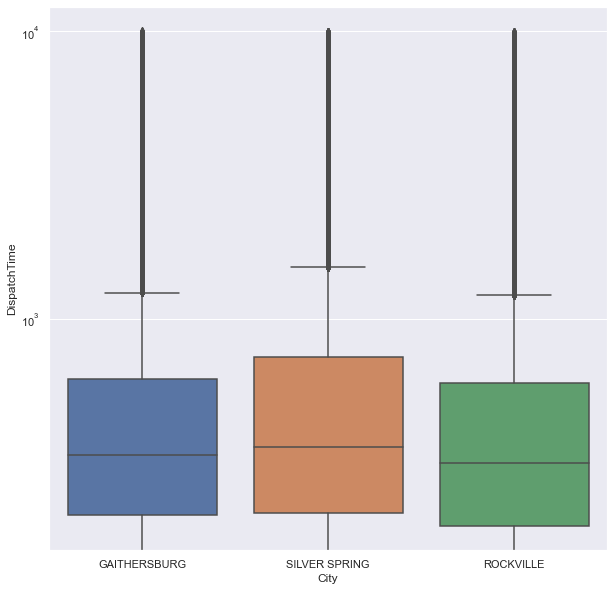

In [200]:
# Boxplots showing the distribution of dispatch time in the three common cities
# Y-Axis is log scaled

ax = sns.boxplot(x='City', y='DispatchTime', data=common_dispatch)
ax.set(yscale = "log")
plt.show()

In [201]:
# Importing packages

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [202]:
# Failed attempt at ANOVA Test

model = ols('DispatchTime ~ C(City)', data = common_dispatch).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(City),1451501472,2,639,0
Residual,577482309235,508469,nan,nan


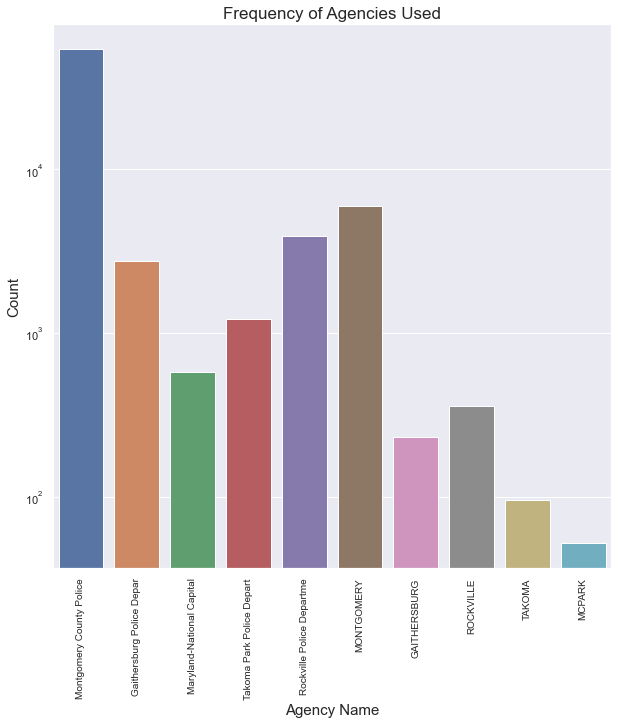

In [203]:
# Showing which agencies are most commonly used
# Y-axis is log-scaled

sns.set(rc = {'figure.figsize': (10,10)})
freq = sns.countplot( x= 'Agency Name', data = df_cri)
freq.set_xticklabels(freq.get_xticklabels(), rotation = 90, fontsize = 10)
freq.set(yscale="log")
plt.title('Frequency of Agencies Used', fontsize = 17)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Agency Name', fontsize = 15)
plt.show()

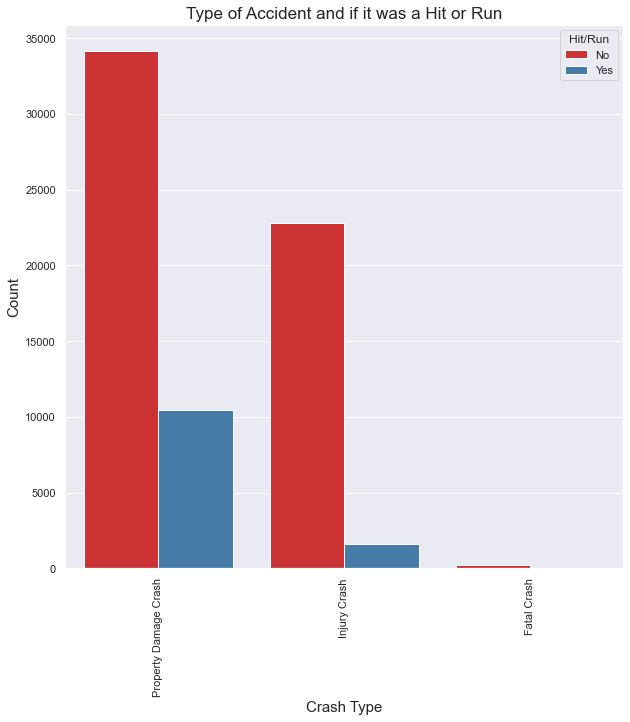

In [204]:
# Determing wheter hit or runs are common for certain accidents

sns.countplot(x = "ACRS Report Type", hue = "Hit/Run", data = df_cri, palette = "Set1")
plt.xticks(rotation = 90)
plt.title('Type of Accident and if it was a Hit or Run', fontsize = 17)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Crash Type', fontsize = 15)
plt.show()

In [205]:
# Creating new dataframe called "suicides" only containing incidents related to suicide

df_pdi.rename(columns={'Initial Type':'Type'}, inplace=True)
suicides = df_pdi[(df_pdi.Type == 'SUICIDAL PERSON/ATTEMPTED SUICIDE')]
suicides.head()

,Incident_ID,Crime Reports,Crash Reports,Start Time,End Time,Priority,Type,Close Type,Address,City,State,Zip,Longitude,Latitude,CallTime CallRoute,Calltime Dispatch,Calltime Arrive,Calltime Cleared,CallRoute Dispatch,Dispatch Arrive,Arrive Cleared,Disposition Desc,Location
45,P1900196253,190028066,NaN,06/12/2019 03:33:19 PM,06/12/2019 05:16:41 PM,1,SUICIDAL PERSON/ATTEMPTED SUICIDE,SUICIDAL PERSON/ATTEMPTED SUICIDE,8000 BLK 13TH ST,SILVER SPRING,MD,20910,-77,39,178,323,1145,6202,144,822,5056,MENTALTRANSPORT,POINT (-77.0296 38.987)
283,P1900258710,190037182,NaN,08/04/2019 10:18:10 PM,08/04/2019 11:39:45 PM,0,SUICIDAL PERSON/ATTEMPTED SUICIDE,SUICIDAL PERSON/ATTEMPTED SUICIDE,11600 BLK LOCKWOOD DR,SILVER SPRING,MD,20904,-77,39,354,399,595,4895,45,195,4300,MENTALTRANSPORT,POINT (-76.9851 39.0416)
355,P1900258815,NaN,NaN,08/05/2019 12:15:56 AM,08/05/2019 12:49:40 AM,0,SUICIDAL PERSON/ATTEMPTED SUICIDE,SUICIDAL PERSON/ATTEMPTED SUICIDE,3100 BLK GOLD MINE RD,BROOKEVILLE,MD,20833,-77,39,84,132,604,2023,47,472,1418,OTHERMISCELLANEOUS,POINT (-77.0634 39.1716)
406,P1900258882,NaN,NaN,08/05/2019 02:14:05 AM,08/05/2019 02:42:58 AM,0,SUICIDAL PERSON/ATTEMPTED SUICIDE,SUICIDAL PERSON/ATTEMPTED SUICIDE,9600 BLK BRASSIE WAY,MONTGOMERY VILLAGE,MD,20886,-77,39,230,297,543,1733,66,246,1189,SUSPICIOUSSIT/PRSON/VEH,POINT (-77.2025 39.1753)
424,P1900258955,NaN,NaN,08/05/2019 04:35:18 AM,08/05/2019 05:10:54 AM,0,SUICIDAL PERSON/ATTEMPTED SUICIDE,SUICIDAL PERSON/ATTEMPTED SUICIDE,1 BLK TAFT CT,ROCKVILLE,MD,20850,-77,39,123,173,476,2136,50,302,1659,MENTALTRANSPORT,POINT (-77.1306 39.0944)


In [206]:
# Creating another datagram grouping the suicidal incidents by their ZIP Code

ZIP_Suicides = suicides.groupby(["Zip", "City"], as_index=False)["Type"].count()
ZIP_Suicides.rename(columns={'Type':'# of Suicidal Incidents'}, inplace=True)
ZIP_Suicides.rename(columns={'Zip':'ZIP Code'}, inplace=True)
pd.options.display.float_format = '{:.0f}'.format
ZIP_Suicides.head(20)

,ZIP Code,City,# of Suicidal Incidents
0,20007,SILVER SPRING,1
1,20012,SILVER SPRING,1
2,20012,WASHINGTON,1
3,20032,BOYDS,1
4,20037,SILVER SPRING,1
5,20132,ROCKVILLE,1
6,20190,GAITHERSBURG,1
7,20613,SILVER SPRING,1
8,20705,BELTSVILLE,3
9,20705,MONTGOMERY VILLAGE,1


In [207]:
# Pulling in data from Maryland's website containing data about each ZIP code such as population and demographics

url_md = "https://opendata.arcgis.com/datasets/eb706b48117b43d482c63d02017fc3ff_1.csv?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D"
df_md = pd.read_csv(url_md)
df_md.head()

,OBJECTID_1,ZCTA5CE10,FIRST_STAT,FIRST_GEOI,FIRST_CLAS,FIRST_MTFC,FIRST_FUNC,ZCTA5N,STATE,AREALAND,AREAWATR,POP100,HU100,NHW,NHB,NHAI,NHA,NHNH,NHO,NHT,HISP,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,POP65_,PCTPOP65_,MEDAGE,VACNS,PVACNS,PHOWN,PWOMORT,PRENT,PLT18SP,REPORT_2_P,REPORT_9_P
0,1,20601,24,2420601,B5,G6350,S,20601,24,115635266,387684,24156,8722,9785,11146,155,880,11,48,849,1282,40,46,1,4,0,0,4,5,1922,8,37,376,4,71,11,20,30,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
1,2,20602,24,2420602,B5,G6350,S,20602,24,35830723,352762,24955,9736,8466,13054,116,731,15,58,999,1516,34,52,0,3,0,0,4,6,1964,8,33,769,8,60,9,34,44,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
2,3,20603,24,2420603,B5,G6350,S,20603,24,44239637,219356,28967,10317,9625,15025,98,1446,24,65,1091,1593,33,52,0,5,0,0,4,6,1400,5,34,531,5,74,5,23,30,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
3,4,20606,24,2420606,B5,G6350,S,20606,24,7501011,1248760,431,230,377,45,1,4,0,0,0,4,88,10,0,1,0,0,0,1,108,25,49,15,6,50,39,18,31,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
4,5,20607,24,2420607,B5,G6350,S,20607,24,54357590,448221,9802,3504,2165,6321,33,560,3,6,234,480,22,64,0,6,0,0,2,5,847,9,41,172,5,83,10,7,22,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...


In [208]:
# Function allowing me to see all the variables in the dataset

pd.set_option('display.max_columns', None)
df_md.head()

,OBJECTID_1,ZCTA5CE10,FIRST_STAT,FIRST_GEOI,FIRST_CLAS,FIRST_MTFC,FIRST_FUNC,ZCTA5N,STATE,AREALAND,AREAWATR,POP100,HU100,NHW,NHB,NHAI,NHA,NHNH,NHO,NHT,HISP,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,POP65_,PCTPOP65_,MEDAGE,VACNS,PVACNS,PHOWN,PWOMORT,PRENT,PLT18SP,REPORT_2_P,REPORT_9_P
0,1,20601,24,2420601,B5,G6350,S,20601,24,115635266,387684,24156,8722,9785,11146,155,880,11,48,849,1282,40,46,1,4,0,0,4,5,1922,8,37,376,4,71,11,20,30,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
1,2,20602,24,2420602,B5,G6350,S,20602,24,35830723,352762,24955,9736,8466,13054,116,731,15,58,999,1516,34,52,0,3,0,0,4,6,1964,8,33,769,8,60,9,34,44,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
2,3,20603,24,2420603,B5,G6350,S,20603,24,44239637,219356,28967,10317,9625,15025,98,1446,24,65,1091,1593,33,52,0,5,0,0,4,6,1400,5,34,531,5,74,5,23,30,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
3,4,20606,24,2420606,B5,G6350,S,20606,24,7501011,1248760,431,230,377,45,1,4,0,0,0,4,88,10,0,1,0,0,0,1,108,25,49,15,6,50,39,18,31,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
4,5,20607,24,2420607,B5,G6350,S,20607,24,54357590,448221,9802,3504,2165,6321,33,560,3,6,234,480,22,64,0,6,0,0,2,5,847,9,41,172,5,83,10,7,22,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...


In [209]:
# Renaming variables from their respective codes to what they represent
# Creating another dataframe extracting the ZIP Code and Population from the MD census dataset

df_md.rename(columns={'ZCTA5N':'ZIP Code'}, inplace=True)
df_md.rename(columns={'POP100':'Population'}, inplace=True)
ZIP_Populations = df_md[['ZIP Code','Population']]

ZIP_Populations.head(15)

,ZIP Code,Population
0,20601,24156
1,20602,24955
2,20603,28967
3,20606,431
4,20607,9802
5,20608,919
6,20609,1120
7,20611,1078
8,20612,261
9,20613,11860


In [210]:
print(ZIP_Populations)

     ZIP Code  Population
0       20601       24156
1       20602       24955
2       20603       28967
3       20606         431
4       20607        9802
..        ...         ...
463     21918        4284
464     21919        3467
465     21920         257
466     21921       44471
467     21930          94

[468 rows x 2 columns]


In [211]:
print(ZIP_Suicides)

    ZIP Code           City  # of Suicidal Incidents
0      20007  SILVER SPRING                        1
1      20012  SILVER SPRING                        1
2      20012     WASHINGTON                        1
3      20032          BOYDS                        1
4      20037  SILVER SPRING                        1
..       ...            ...                      ...
405    21044  SILVER SPRING                        1
406    21771     GERMANTOWN                        1
407    22102  SILVER SPRING                        1
408     FRED     KENSINGTON                        1
409       HO      ROCKVILLE                        1

[410 rows x 3 columns]


In [221]:
#Merging the two datasets together

ZIP_final = pd.merge(ZIP_Populations, ZIP_Suicides, on="ZIP Code")
ZIP_final.head(20)

,ZIP Code,Population,City,# of Suicidal Incidents
0,20613,11860,SILVER SPRING,1
1,20705,26188,BELTSVILLE,3
2,20705,26188,MONTGOMERY VILLAGE,1
3,20705,26188,SILVER SPRING,2
4,20706,38692,CHEVY CHASE,1
5,20707,31538,GAITHERSBURG,1
6,20707,31538,ROCKVILLE,1
7,20707,31538,SILVER SPRING,1
8,20708,25546,SILVER SPRING,1
9,20721,27016,ROCKVILLE,1


In [222]:
# Since the data is now merged, we can calculate the suicidal incident rate

ZIP_final['Suicidal_Incident_Rate'] = ZIP_final['# of Suicidal Incidents'] / ZIP_final['Population']
pd.options.display.float_format = '{:.08f}'.format
ZIP_final.head(20)

,ZIP Code,Population,City,# of Suicidal Incidents,Suicidal_Incident_Rate
0,20613,11860,SILVER SPRING,1,0.00008432
1,20705,26188,BELTSVILLE,3,0.00011456
2,20705,26188,MONTGOMERY VILLAGE,1,0.00003819
3,20705,26188,SILVER SPRING,2,0.00007637
4,20706,38692,CHEVY CHASE,1,0.00002585
5,20707,31538,GAITHERSBURG,1,0.00003171
6,20707,31538,ROCKVILLE,1,0.00003171
7,20707,31538,SILVER SPRING,1,0.00003171
8,20708,25546,SILVER SPRING,1,0.00003915
9,20721,27016,ROCKVILLE,1,0.00003702


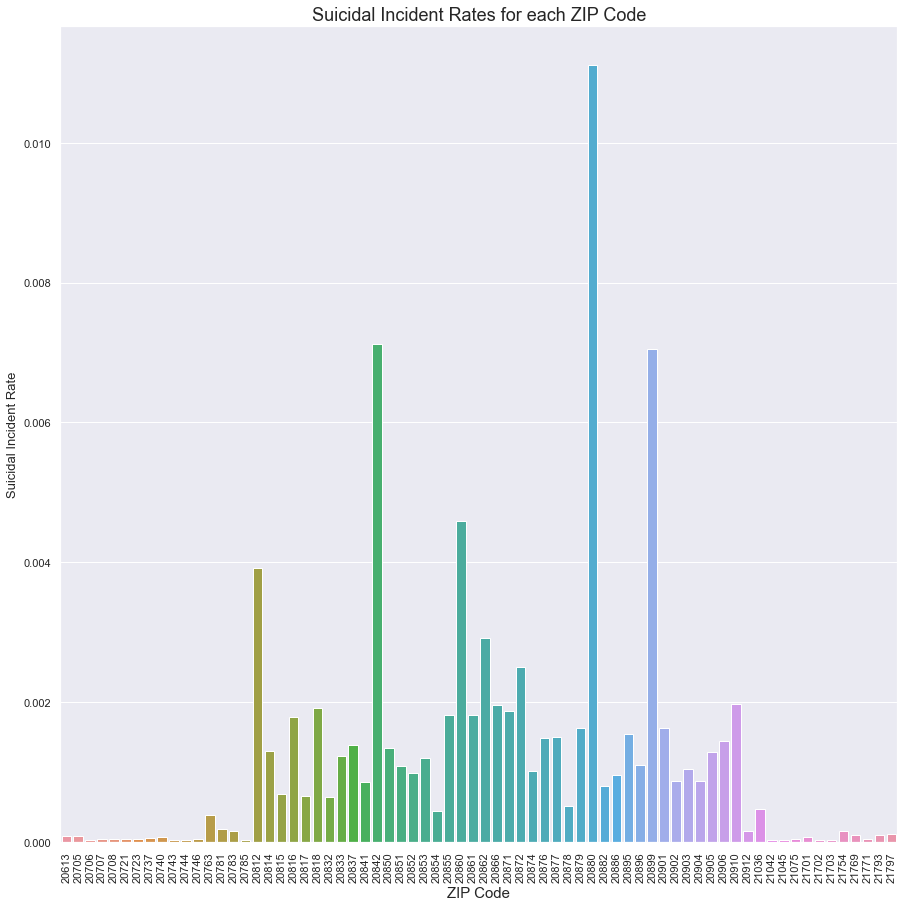

In [223]:
sns.set(rc = {'figure.figsize': (15,15)})
sns.barplot(x= 'ZIP Code', y = 'Suicidal_Incident_Rate', data = ZIP_final, ci = None)
plt.xticks(rotation = 90)
plt.title('Suicidal Incident Rates for each ZIP Code', fontsize = 18)
plt.ylabel('Suicidal Incident Rate', fontsize = 13)
plt.xlabel('ZIP Code', fontsize = 15)
plt.show()

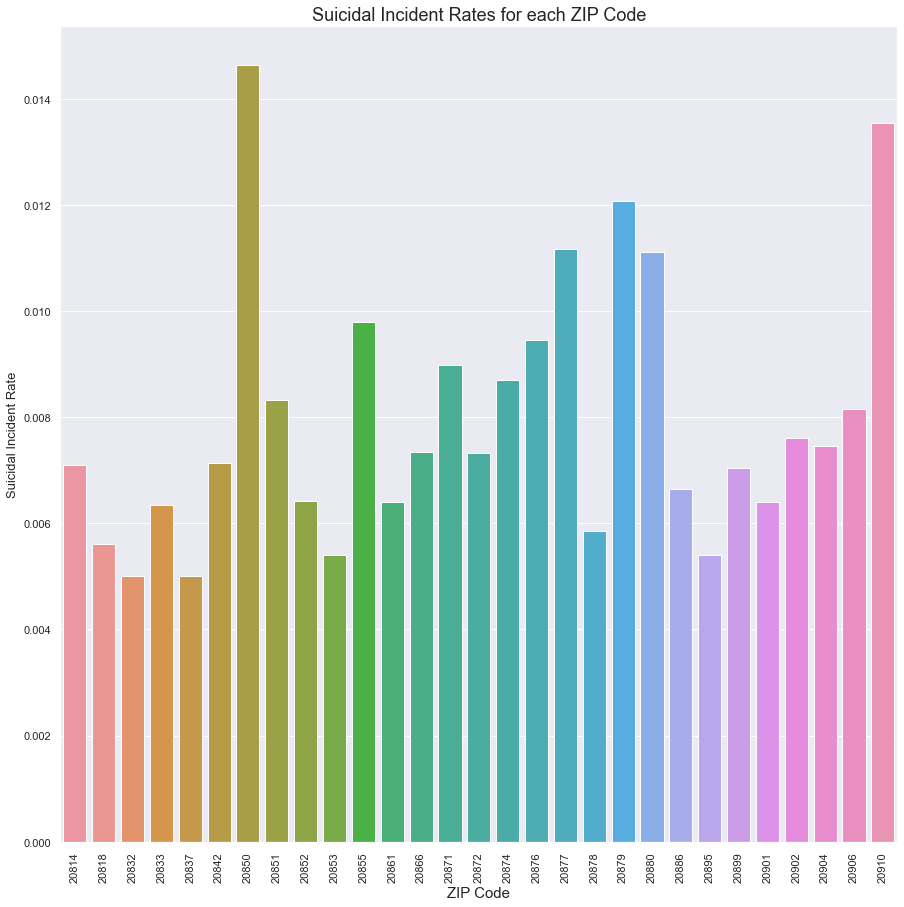

In [226]:
# Visualization showing which ZIP codes have the highest rate of Suicidal Incidents

# 1 - 20850 (Rockville)
# 2 - 20910 (Silver Spring/Takoma Park)
# 3 - 20879 (Gaithersburg)

ZIP_final_high = ZIP_final[(ZIP_final.Suicidal_Incident_Rate > 0.005)]
sns.barplot(x= 'ZIP Code', y = 'Suicidal_Incident_Rate', data = ZIP_final_high, ci = None)
plt.xticks(rotation = 90)
plt.title('Suicidal Incident Rates for each ZIP Code', fontsize = 18)
plt.ylabel('Suicidal Incident Rate', fontsize = 13)
plt.xlabel('ZIP Code', fontsize = 15)
plt.show()